<a href="https://colab.research.google.com/github/sanvir/my_source_2/blob/main/My_source_2_20_04_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.mql5.com/ru/articles/9514
# https://cran.r-project.org/web/packages/PSF/vignettes/PSF_vignette.html
# https://habr.com/ru/post/562092/
# https://www.mql5.com/ru/blogs/post/746398
# ии прогноз свечей пример colab
#






In [ ]:
from os import rename # 
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf



# Загружаем котировки из файла
#students_performance = pd.read_csv('./EURUSD_M1_202201102215_202204181408.csv', sep='\t') # Загрузка файла с сайта
My_NeuralNetwork = pd.read_csv("https://github.com/sanvir/my_source_2/blob/main/2022-04-19.txt?raw=true", sep=',', 
                               encoding='windows-1251', names=["Номер", "Время", "Инструмент", "Рынок", "nul_2","Цена", "nul_3","Количество",
                                                               "Объем","nul_6","nul_7","nul_8","nul_9","nul_10","nul_11","Операция"], index_col='Номер', parse_dates=["Время"]) # Загрузка файла с сайта
                                                                                                                              # , parse_dates=["Время"]
# Выборка данных:          
My_NeuralNetwork = My_NeuralNetwork[['Время', 'Цена', 'Количество', 'Операция']] # Если нужно вывести несколько столбцов, в квадратные скобки нужно вставить список с их названиями
#My_NeuralNetwork = My_NeuralNetwork.loc[My_NeuralNetwork['Количество'] > 300]  # Оставить строки, где значение дольше 300

#My_NeuralNetwork.drop_duplicates(subset=['Время'], keep=False)

# 'Операция' Заменяем S на 0, а B на 1
My_NeuralNetwork['Операция'] = [x.replace("S", "0") for x in My_NeuralNetwork['Операция']] # Заменяем S на 0
My_NeuralNetwork['Операция'] = [x.replace("B", "1") for x in My_NeuralNetwork['Операция']] # Заменяем B на 1


# Будущее_Вектор_в_пунктах
My_NeuralNetwork['Будущее_Вектор_в_пунктах'] = (My_NeuralNetwork['Цена'] - (My_NeuralNetwork['Цена'].shift(-1,fill_value=0))) # цену акций предыдущего дня .shift(-1,fill_value=0) в виде нового столбца
My_NeuralNetwork.loc[My_NeuralNetwork['Операция'] == '1', 'Будущее_Вектор_в_пунктах'] = (My_NeuralNetwork['Будущее_Вектор_в_пунктах']*-1) # Если число отрицательное, значит цена двинулась вниз = 0

# Будущее_Вектор
My_NeuralNetwork.loc[My_NeuralNetwork['Будущее_Вектор_в_пунктах'] < 0, 'Будущее_Вектор'] = 0          # Если число отрицательное, значит цена двинулась вниз = 0
My_NeuralNetwork.loc[My_NeuralNetwork['Будущее_Вектор_в_пунктах'] > 0, 'Будущее_Вектор'] = 1          # Если число положительное, значит цена двинулась вверх = 1

#Удаляю строки с Nan , 0, 1000 и -1000
My_NeuralNetwork = My_NeuralNetwork.loc[My_NeuralNetwork['Будущее_Вектор_в_пунктах'] !=0 ]  # Оставить строки, где значение
My_NeuralNetwork = My_NeuralNetwork.loc[My_NeuralNetwork['Будущее_Вектор'] !='NaN' ]  # Оставить строки, где значение
#My_NeuralNetwork = My_NeuralNetwork.loc[My_NeuralNetwork['Вектор_предыдущий'] !='NaN' ]  # Оставить строки, где значение
My_NeuralNetwork = My_NeuralNetwork.loc[My_NeuralNetwork['Будущее_Вектор_в_пунктах'] <1000 ]  # Оставить строки, где значение
My_NeuralNetwork = My_NeuralNetwork.loc[My_NeuralNetwork['Будущее_Вектор_в_пунктах'] >-1000 ]  # Оставить строки, где значение

#Вектор_предыдущий
My_NeuralNetwork['Вектор_предыдущий'] = (My_NeuralNetwork['Будущее_Вектор'].shift(1,fill_value=0)) # Вектор_результат .shift(1,fill_value=0) в виде нового столбца

# В ПЕРВОЙ СТРОКЕ ОШИБКА В СТОЛБЦЕ "Вектор_предыдущий" ТАК КАК ПРЕДЫДУЩЕГО ВЕКТОРА В ПРИНЦИПЕ БЫТЬ НЕ МОЖЕТ
#My_NeuralNetwork.drop(My_NeuralNetwork.index[0], axis= 0)
#My_NeuralNetwork = My_NeuralNetwork.loc[My_NeuralNetwork['Номер'] !=aaa ]  # Оставить строки, где значение



#My_NeuralNetwork = My_NeuralNetwork.drop(My_NeuralNetwork[My_NeuralNetwork.items[0]], axis=0)
# 

#My_NeuralNetwork = pd.read_csv("https://github.com/sanvir/my_source_2/blob/main/222.txt?raw=true", header=None, sep=",", encoding='windows-1251').add_prefix("data")
#My_NeuralNetwork = pd.DataFrame(My_NeuralNetwork).add_prefix("data") # ДОбавить названия столбцов по порядку
#orders = pd.read_csv('orders.csv', index_col='id') # Раз загружаем заказы, укажем, что колонка id пойдет в индекс



#My_NeuralNetwork.drop(['Номер','lunch'], axis=1)
#df = pd.read_csv('1459966468_324.csv', encoding='utf8')
#My_NeuralNetwork.columns = [x.replace("<", "") for x in My_NeuralNetwork.columns] # Заменяем пробелы на _
#My_NeuralNetwork.columns = [x.replace(">", "") for x in My_NeuralNetwork.columns] # Заменяем пробелы на _
#My_NeuralNetwork.items = [x.replace(" ", "") for x in My_NeuralNetwork.columns] # Заменяем пробелы на _
#My_NeuralNetwork['Объем'] = My_NeuralNetwork['Объем'].str.replace('.0', '')
#My_NeuralNetwork['Количество'] = My_NeuralNetwork['Количество'].str.replace(',0', '')
#My_NeuralNetwork.drop(My_NeuralNetwork.columns[0,1], axis=1)



#My_NeuralNetwork = df[df['check']]

# Отбираем только те строки, где Количество больше 300

#My_NeuralNetwork['Цена'].values[0] # работает, значение изячейки

#My_NeuralNetwork['Вектор_движения'] =  (My_NeuralNetwork['Цена']+1)
#My_NeuralNetwork.drop(2, axis=1)
#My_NeuralNetwork.info()
#My_NeuralNetwork.dtypes
#My_NeuralNetwork.head()
df=My_NeuralNetwork
df.to_excel('2022-04-19.xlsx', sheet_name='Sheet_name_1') # Сохраняю в файл


df.head(5)
#My_NeuralNetwork
#My_NeuralNetwork.sample() # 6 случайных записей



,Время,Цена,Количество,Операция,Будущее_Вектор_в_пунктах,Будущее_Вектор,Вектор_предыдущий
Номер,,,,,,,
1892947255925678097,2022-04-21 10:02:51,81300,120,0,172,1.0,0.0
1892947255925680735,2022-04-21 10:03:34,81128,163,0,-2,0.0,1.0
1892947255925680953,2022-04-21 10:03:40,81130,112,0,-65,0.0,0.0
1892947255925683127,2022-04-21 10:04:46,81195,112,1,5,1.0,0.0
1892947255925683605,2022-04-21 10:04:58,81200,150,1,-116,0.0,1.0


In [ ]:
# buy 81300 81200(max) разница плюсовая

df['Цена'].max()

81539

In [ ]:
df['Цена'].min()

79800

In [ ]:
#df.loc[My_NeuralNetwork['Номер'] < df.values, 'Будущее_Вектор_в_пунктах_MAX']
#df.loc[df['Цена'].idxmin()]
#My_NeuralNetwork['Цена'].values[0]

KeyError: ignored

In [ ]:
date_time = pd.to_datetime(My_NeuralNetwork.pop('Время'), format='%d.%m.%Y %H:%M:%S')
#df['Время'] = pd.to_datetime(df.pop['Время'], format='%d.%m.%Y %H:%M:%S')
timestamp_s = date_time.map(pd.Timestamp.timestamp) # Точно так же Date Timeстолбец очень полезен, но не в такой строковой форме. Начните с преобразования его в секунды:

#df.head(5)
timestamp_s

Номер
1892947255925678097    1.650535e+09
1892947255925680735    1.650535e+09
1892947255925680953    1.650535e+09
1892947255925683127    1.650535e+09
1892947255925683605    1.650535e+09
                           ...     
1892947255926111094    1.650565e+09
1892947255926116925    1.650566e+09
1892947255926117952    1.650566e+09
1892947255926122273    1.650566e+09
1892947255926122488    1.650567e+09
Name: Время, Length: 217, dtype: float64

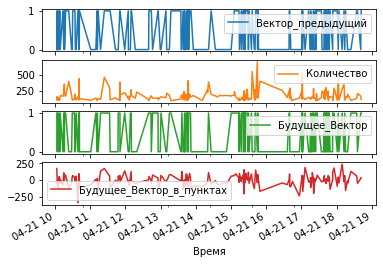

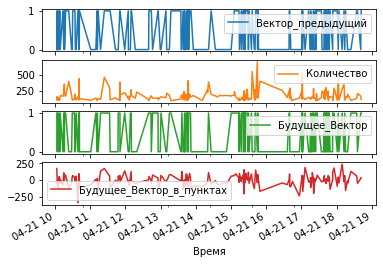

In [ ]:
plot_cols = ['Вектор_предыдущий', 'Операция','Количество','Будущее_Вектор','Будущее_Вектор_в_пунктах']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)


plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [ ]:
df.describe().transpose() # посмотрим на статистику набора данных

,count,mean,std,min,25%,50%,75%,max
Цена,217.0,80593.129032,452.540148,79800.0,80180.0,80700.0,80950.0,81539.0
Количество,217.0,179.184332,86.390388,101.0,124.0,152.0,200.0,697.0
Будущее_Вектор_в_пунктах,217.0,1.391705,79.001281,-344.0,-39.0,1.0,52.0,239.0
Будущее_Вектор,217.0,0.502304,0.501151,0.0,0.0,1.0,1.0,1.0
Вектор_предыдущий,217.0,0.497696,0.501151,0.0,0.0,0.0,1.0,1.0


Text(0.5, 1.0, 'Time of day signal')

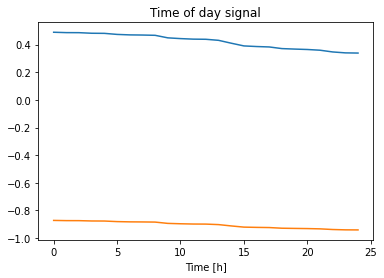

In [ ]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [ ]:
df

,Цена,Количество,Операция,Будущее_Вектор_в_пунктах,Будущее_Вектор,Вектор_предыдущий,Day sin,Day cos,Year sin,Year cos
Номер,,,,,,,,,,
1892947255925678097,81300,120,0,172,1.0,0.0,0.489192,-0.872176,0.944272,-0.329166
1892947255925680735,81128,163,0,-2,0.0,1.0,0.486462,-0.873701,0.944269,-0.329174
1892947255925680953,81130,112,0,-65,0.0,0.0,0.486081,-0.873914,0.944269,-0.329175
1892947255925683127,81195,112,1,5,1.0,0.0,0.481881,-0.876237,0.944265,-0.329188
1892947255925683605,81200,150,1,-116,0.0,1.0,0.481116,-0.876657,0.944264,-0.329190
...,...,...,...,...,...,...,...,...,...,...
1892947255926111094,80340,106,0,130,1.0,0.0,-0.994284,0.106770,0.942282,-0.334819
1892947255926116925,80210,134,0,60,1.0,1.0,-0.988778,0.149392,0.942243,-0.334930
1892947255926117952,80150,210,1,-50,0.0,1.0,-0.987870,0.155285,0.942238,-0.334945


In [ ]:
# Разделить данные
#Вы будете использовать (70%, 20%, 10%)разделение для обучающих, проверочных и тестовых наборов. Обратите внимание, что данные не перемешиваются случайным образом перед разделением. Это по двум причинам:
#Это гарантирует, что разделение данных на окна последовательных выборок по-прежнему возможно.
#Это гарантирует, что результаты проверки/тестирования будут более реалистичными, поскольку они оцениваются на основе данных, собранных после обучения модели.
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [ ]:
train_mean

Цена                         8.079642e+04
Количество                   1.785762e+02
Операция                    7.351067e+144
Будущее_Вектор_в_пунктах     2.549669e+00
Будущее_Вектор               5.231788e-01
Вектор_предыдущий            5.231788e-01
dtype: float64

In [ ]:
# Нормализация данных
#Перед обучением нейронной сети важно масштабировать функции. Нормализация — это распространенный способ масштабирования: вычесть среднее значение и разделить на стандартное отклонение каждого признака.
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


TypeError: ignored

In [ ]:
test_df

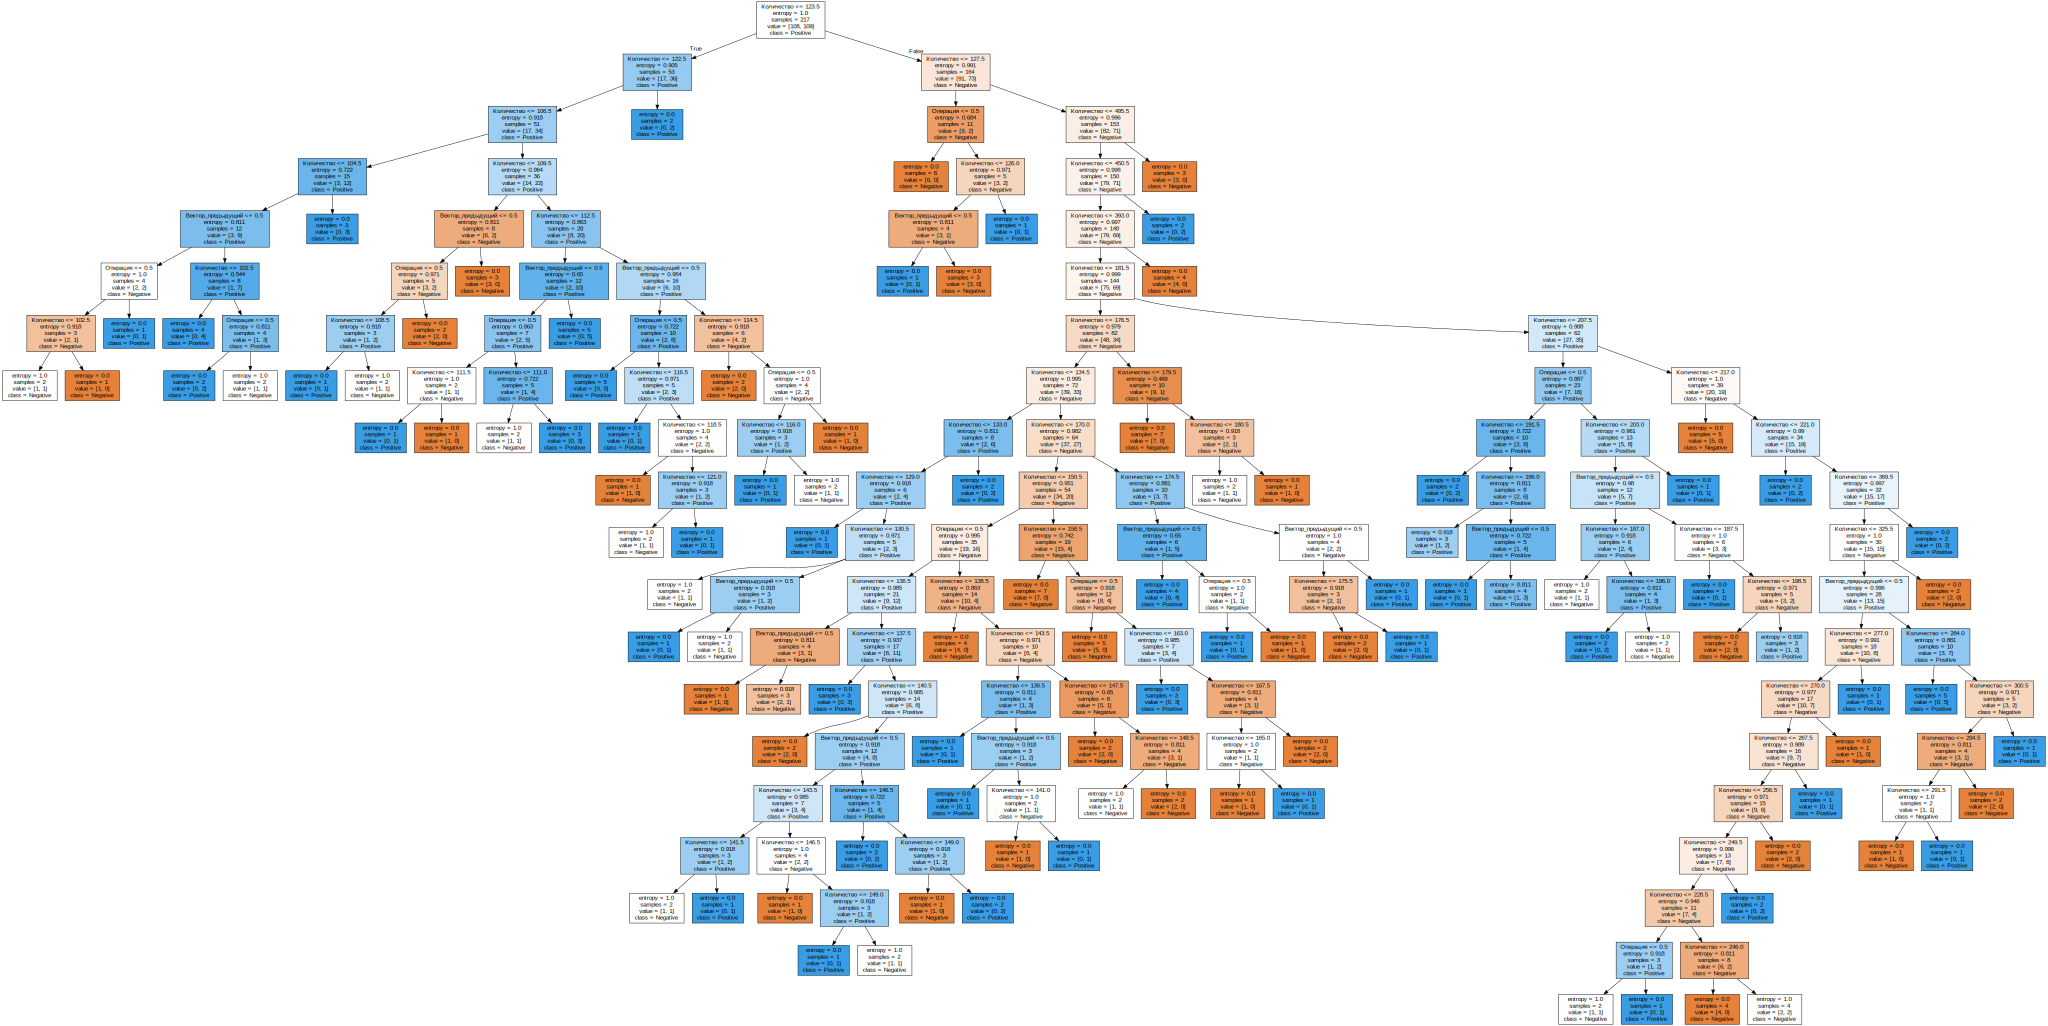

In [ ]:
# Решающие деревья
from sklearn import tree # Решающие деревья
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = df
# Создаём датафрейм с данными
#data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
#data

#clf = tree.DecisionTreeClassifier()
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf

X = data[['Вектор_предыдущий', 'Операция','Количество','Вектор_предыдущий']]
#X = data[['Операция','Вектор_предыдущий']]
y = data.Будущее_Вектор
clf.fit(X,y) # наше дерево - Обучилось

# Рисуем блок-схему дерева решений, вариант 1
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

#tree.export_text(clf, out_file=None, feature_names=list(X), class_names=['Negative','Positive'], filled = True)
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=['Negative','Positive'], filled = True))
display(SVG(graph.pipe(format='svg')))

# Блок-схема дерева решений, вариант 2
#from sklearn.tree import plot_tree
#plot_tree(clf,filled=True); 

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

ddd = My_NeuralNetwork.loc[My_NeuralNetwork['Время'] == '10:16:02' ]  # Оставить строки, где значение
X = ddd[['Операция','Вектор_предыдущий']]
#X
#predict (X [, ddd])
#predict_log_proba(X)
#model.predict(X, check_input=True)
model.predict(ddd)
#ddd

NameError: ignored

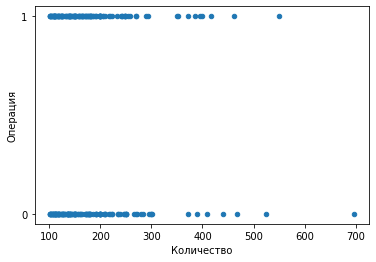

In [ ]:
#sns.lmplot(x='Операция', y='Вектор', data=df) # вариант №1, Тучки - это и есть кластера
My_NeuralNetwork.plot.scatter(x='Количество', y='Операция') # График кореляции между переменными

In [ ]:
# дано: Количество(объем), Операция(sell/buy), Вектор(цена текущая - цена старая)
# vector_temp=Операция(sell/buy)+Вектор
# Найти: Вектор_результат)
# Вероятно # Предыдущий_вектор последняя или первая строчка - бракованная
# My_NeuralNetwork.drop('1892947255925678097', axis=0)
df = My_NeuralNetwork


#vector_temp = price_temp > Цена and Operation=="BUY"
#vector_temp 1 = 0 and Operation=="1"
#vector_temp 2 = 1 and Operation=="1"
#vector_temp 3 = 0 and Operation=="0"
#vector_temp 4 = 0 and Operation=="0"


df
#My_NeuralNetwork

,Время,Инструмент,Цена,Количество,Операция,Вектор_в_пунктах,Вектор,Вектор_результат
Номер,,,,,,,,
1892947255925678097,10:02:51,SiM2,81300,120,0,172,1,0
1892947255925680735,10:03:34,SiM2,81128,163,0,-2,0,0
1892947255925680953,10:03:40,SiM2,81130,112,0,-65,0,0
1892947255925683127,10:04:46,SiM2,81195,112,1,-5,0,1
1892947255925683605,10:04:58,SiM2,81200,150,1,116,1,0
...,...,...,...,...,...,...,...,...
1892947255926111094,18:24:31,SiM2,80340,106,0,130,1,1
1892947255926116925,18:34:22,SiM2,80210,134,0,60,1,1
1892947255926117952,18:35:44,SiM2,80150,210,1,50,1,0


In [ ]:
if 1 > 10:
    print("Число больше 10")
else: print("Число меньше 10")

Число меньше 10


In [ ]:
months = ['jan', 'feb', 'mar', 'apr']
sales = {
    'revenue':     [100, 200, 300, 400],
    'items_sold':  [23, 43, 55, 65],
    'new_clients': [10, 20, 30, 40]
}
sales_df = pd.DataFrame(data=sales, index=months)

sales_df
#data.tail()
#data['feb']

In [ ]:
#data.drop([0], axis=0)
df.drop([1], inplace=True, axis=1)
df = data.info()
#data.dtypes

In [ ]:
My_NeuralNetwork.tail() # чтобы просто отобразить содержимое переменной, последние 5 строчек

In [ ]:
columns = My_NeuralNetwork.columns[0] # Извлечь название столбца
columns

In [ ]:
#My_NeuralNetwork.items = [x.replace(",", ".") for x in My_NeuralNetwork.items] # Заменяем пробелы на _
#data['Вектор_движения'] =  (My_NeuralNetwork['vector_temp'])
#data['Вектор_движения'] =  (My_NeuralNetwork['vector_temp']==2)
#студенты, не прошедшие тест
#student_stats[student_stats['test preparation course'] != 'completed']
#if (data['vector_temp']>1): 
  #data['Вектор_движения']
#студенты со стандартным ланчем
#student_stats.query("lunch == 'standard'")
#data['Операция'] =  (My_NeuralNetwork['Операция']*1)
#data.columns=["a", "b", "c", "d"]
#(data.Операция == 'BUY').value_counts()[True]/data.shape[0]
#data.loc[data['vector_temp'] > 3] # отобрать те значения которые превышают среднее значения
#data.drop(['nul_3'], axis=1)
#data.loc.drop(data.index[[1,4]])
data = My_NeuralNetwork.drop([0], axis=1)
# В новый DataFrame загоняем выборку из нашей таблицы
#data = My_NeuralNetwork.iloc[['1']]
#data.drop(['nul_3'], axis=1)
data.tail() # чтобы просто отобразить содержимое переменной, последние 5 строчек
#data.shape
#data.dtypes

In [ ]:
sns.lmplot(x='CLOSE', y='TICKVOL', data=My_NeuralNetwork) # вариант №1, Тучки - это и есть кластера
#sns.scatterplot(dataset.iloc[:, 0], dataset.iloc[:, 1]) # вариант №2, Тучки - это и есть кластера
#dataset.plot.scatter(x='x', y='y') # вариант №3, Тучки - это и есть кластера

In [ ]:
#My_NeuralNetwork.items = [x.replace("1.08018", "_") for x in My_NeuralNetwork.columns] # Заменяем пробелы на _
#My_NeuralNetwork['day'] = My_NeuralNetwork['DATE'].apply(lambda r:r.day)
#%timeit(df.date.dt.strftime('%d'))
My_NeuralNetwork['DATE'] =  My_NeuralNetwork.to_datetime(My_NeuralNetwork['DATE'], format='%Y.%m.%d')
#My_NeuralNetwork['day'] = My_NeuralNetwork['DATE'].dt.strftime('%m.%d')
My_NeuralNetwork.tail() # чтобы просто отобразить содержимое переменной, последние 5 строчек

In [ ]:
# Решающие деревья
from sklearn import tree # Решающие деревья
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Создаём датафрейм с данными
#data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
#data

#clf = tree.DecisionTreeClassifier()
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf

X = data[['TICKVOL', 'TIME']]
y = data.CLOSE
clf.fit(X,y) # наше дерево - Обучилось

# Рисуем блок-схему дерева решений, вариант 1
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Negative','Positive'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

# Блок-схема дерева решений, вариант 2
from sklearn.tree import plot_tree
plot_tree(clf,filled=True); 

NameError: ignored

In [ ]:
My_NeuralNetwork.plot.scatter(x='OPEN', y='CLOSE') # График кореляции между переменными

In [ ]:
# Графики
My_NeuralNetwork.CLOSE.hist() # График среднего значения

In [ ]:
#https://github.com/sanvir/my_source_1/blob/main/II/II.xlsx


#students_performance = pd.read_excel('https://github.com/sanvir/my_source_1/blob/main/II/II.xlsx?raw=true') # Загрузка файла с сайта

#df = pd.read_csv('1459966468_324.csv', encoding='utf8')
#students_performance.columns = [x.replace(" ", "_") for x in students_performance.columns] # Заменяем пробелы на _
#students_performance.head() # чтобы просто отобразить содержимое переменной, первые 5 строчек
students_performance.tail() # чтобы просто отобразить содержимое переменной, последние 5 строчек